In [1]:
import pandas as pd



In [2]:
file_path = '/Users/kudrasov_a_d/Downloads/transaction_fraud_data.parquet'

df = pd.read_parquet(file_path)

df.head()

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,is_fraud,last_hour_activity.num_transactions,last_hour_activity.total_amount,last_hour_activity.unique_merchants,last_hour_activity.unique_countries,last_hour_activity.max_single_amount
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,197.153.60.199,False,False,False,False,1197,3.349856e+07,105,12,1.925481e+06
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,208.123.221.203,True,True,False,True,509,2.011476e+07,100,12,5.149117e+06
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,10.194.159.204,False,False,False,False,332,3.916385e+07,97,12,1.852242e+06
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,17.230.177.225,False,False,False,False,764,2.201260e+07,105,12,2.055798e+06
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,136.241.219.151,True,False,False,True,218,4.827636e+06,88,12,1.157231e+06


In [3]:
df2 = pd.read_parquet("/Users/kudrasov_a_d/Downloads/historical_currency_exchange.parquet")

df2.head()

,date,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD,USD
0,2024-09-30,1.443654,5.434649,1.351196,0.895591,0.747153,142.573268,19.694724,1668.736400,94.133735,1.280156,1
1,2024-10-01,1.442917,5.444170,1.352168,0.897557,0.746956,143.831429,19.667561,1670.694524,92.898519,1.284352,1
2,2024-10-02,1.449505,5.425444,1.348063,0.903056,0.752241,143.806861,19.606748,1669.653006,94.583198,1.286983,1
3,2024-10-03,1.456279,5.442044,1.351451,0.906018,0.754584,146.916773,19.457701,1670.097873,95.655442,1.294391,1
4,2024-10-04,1.460930,5.477788,1.355260,0.906452,0.761891,146.592323,19.363467,1649.763738,94.755337,1.296800,1


In [4]:
print("\nРаспределение мошенничества:")
fraud_rate = df['is_fraud'].mean()
print(f"Доля мошеннических транзакций: {fraud_rate:.4f} ({fraud_rate*100:.2f}%)")


Распределение мошенничества:
Доля мошеннических транзакций: 0.1997 (19.97%)


In [5]:
vendor_fraud = df.groupby('vendor_category')['is_fraud'].agg(['count', 'mean']).sort_values('mean', ascending=False)
print("\nТоп категорий по доле мошенничества:")
print(vendor_fraud.head(10))


Топ категорий по доле мошенничества:
                  count      mean
vendor_category                  
Travel           935790  0.200341
Grocery          934029  0.200194
Gas              935401  0.199731
Restaurant       936178  0.199696
Entertainment    936173  0.199632
Education        933542  0.199459
Retail           935883  0.199398
Healthcare       936770  0.199376


In [6]:
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour
df['day_of_week'] = pd.to_datetime(df['timestamp']).dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6])

In [7]:
time_fraud = df.groupby(['hour', 'is_weekend'])['is_fraud'].mean().unstack()
print("\nАнализ мошенничества по времени:")
print(time_fraud)



Анализ мошенничества по времени:
is_weekend     False     True 
hour                          
0           0.266110  0.267854
1           0.593077  0.591098
2           0.592261  0.591050
3           0.591502  0.591255
4           0.591616  0.590207
5           0.200670  0.200362
6           0.211691  0.210616
7           0.137076  0.137513
8           0.102600  0.102010
9           0.117491  0.118727
10          0.137239  0.139401
11          0.118608  0.119134
12          0.102792  0.103662
13          0.119255  0.116886
14          0.138513  0.139678
15          0.138154  0.140504
16          0.117327  0.118024
17          0.102536  0.101871
18          0.090708  0.090721
19          0.103096  0.103578
20          0.136819  0.137185
21          0.209759  0.206155
22          0.124281  0.124866
23          0.147366  0.146529


In [10]:
geo_fraud = df.groupby(['is_outside_home_country'])['is_fraud'].agg(['count', 'mean'])
print("\nАнализ по географии:")
print(geo_fraud)



Анализ по географии:
                           count      mean
is_outside_home_country                   
False                    5073605  0.024902
True                     2410161  0.567753


In [11]:
device_fraud = df.groupby('device')['is_fraud'].agg(['count', 'mean']).sort_values('mean', ascending=False)
print("\nТоп устройств по доле мошенничества (первые 10):")
print(device_fraud.head(10))


Топ устройств по доле мошенничества (первые 10):
                   count      mean
device                            
Chip Reader       217324  1.000000
Magnetic Stripe   217204  1.000000
NFC Payment       216519  1.000000
Firefox          1120952  0.126831
Safari           1120245  0.126204
Android App      1126117  0.125070
Chrome           1132384  0.123710
iOS App          1143461  0.122703
Edge             1189560  0.116753


In [12]:
print("\nСтатистика по суммам:")
print(df.groupby('is_fraud')['amount'].describe())


Статистика по суммам:
              count           mean            std    min      25%      50%  \
is_fraud                                                                     
False     5989047.0   30242.538284   87656.818774  17.95  368.220   903.51   
True      1494719.0  118773.589871  347542.933086   0.01  295.585  5626.06   

               75%         max  
is_fraud                        
False     14535.93  1240629.47  
True      63556.20  6253152.62  


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

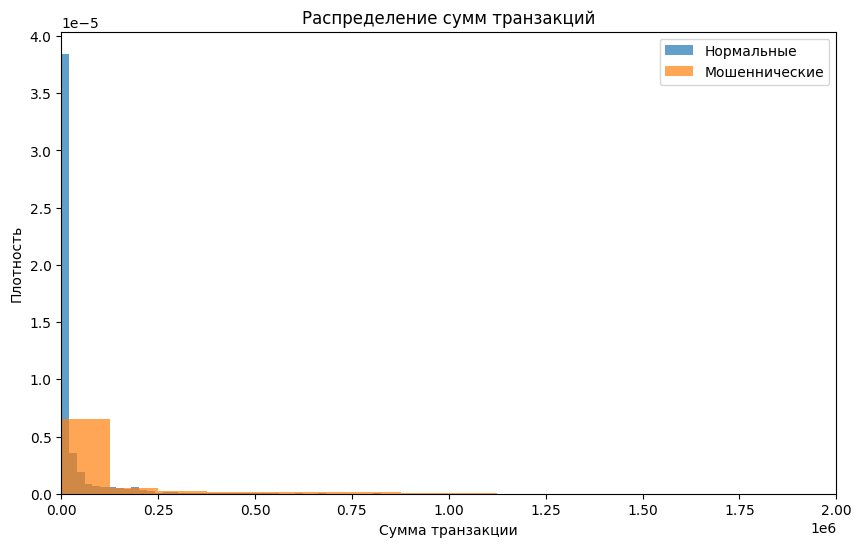

In [19]:
plt.figure(figsize=(10, 6))
fraud_amounts = df[df['is_fraud'] == True]['amount']
normal_amounts = df[df['is_fraud'] == False]['amount'].sample(n=10000)  # Сэмпл для скорости

plt.hist(normal_amounts, bins=50, alpha=0.7, label='Нормальные', density=True)
plt.hist(fraud_amounts, bins=50, alpha=0.7, label='Мошеннические', density=True)
plt.xlabel('Сумма транзакции')
plt.ylabel('Плотность')
plt.legend()
plt.xlim(0, 2 * 10**6)
plt.title('Распределение сумм транзакций')
plt.show()

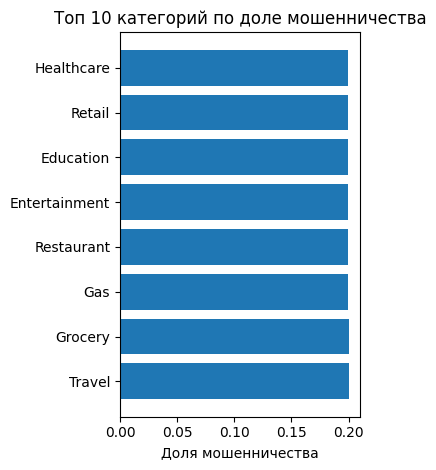

In [21]:
plt.subplot(1, 2, 2)
top_vendors = vendor_fraud.head(10)
plt.barh(range(len(top_vendors)), top_vendors['mean'])
plt.yticks(range(len(top_vendors)), top_vendors.index)
plt.title('Топ 10 категорий по доле мошенничества')
plt.xlabel('Доля мошенничества')
plt.tight_layout()
plt.show()